<a href="https://colab.research.google.com/github/amitroyal8755/Project/blob/main/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np             #import all library related with datasets

In [5]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_trian[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train=y_train.reshape(-1,)

In [14]:
y_test=y_test.reshape(-1,)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

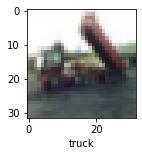

In [17]:
plot_sample(x_train,y_train,2)

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.6640 - accuracy: 0.4231
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.2459 - accuracy: 0.5591
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0997 - accuracy: 0.6139
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0002 - accuracy: 0.6539
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9306 - accuracy: 0.6769
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8703 - accuracy: 0.6999
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8219 - accuracy: 0.7144
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7765 - accuracy: 0.7304
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7416 - accuracy: 0.7438
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [22]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0899 - accuracy: 0.6637


[1.089930772781372, 0.6636999845504761]

In [23]:
y_pred = cnn.predict(x_test)

In [24]:
y_pred[:5]

array([[2.39537028e-03, 9.85010876e-04, 1.64580122e-02, 6.36769831e-01,
        2.74353981e-04, 7.35905915e-02, 6.44173697e-02, 9.77586838e-04,
        1.97383568e-01, 6.74838014e-03],
       [1.07938973e-02, 7.89413095e-01, 8.41591259e-07, 3.25252955e-07,
        1.92974525e-07, 5.56857338e-10, 3.97576869e-08, 1.30983402e-09,
        7.09232911e-02, 1.28868386e-01],
       [1.24952435e-01, 1.21339962e-01, 3.11443489e-03, 4.35408112e-03,
        1.92653586e-03, 3.04526708e-04, 1.52835622e-03, 1.09151565e-03,
        4.60649461e-01, 2.80738682e-01],
       [6.36996508e-01, 2.36560751e-04, 2.46045720e-02, 5.10479771e-02,
        1.96147914e-04, 1.92628681e-06, 7.74181820e-03, 1.52319946e-04,
        2.78145730e-01, 8.76388629e-04],
       [2.47180233e-05, 5.75351487e-06, 1.99598307e-03, 1.66078079e-02,
        1.27655780e-02, 6.81393268e-03, 9.61658418e-01, 5.08010817e-06,
        4.15443137e-05, 8.11358987e-05]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]

In [26]:
y_classes[:5]

[3, 1, 8, 0, 6]

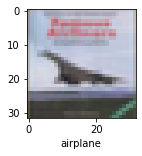

In [28]:
plot_sample(x_test, y_test,3)

In [29]:
from sklearn.metrics import classification_report

In [32]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.59      0.66      1000
           1       0.84      0.70      0.77      1000
           2       0.59      0.53      0.56      1000
           3       0.46      0.47      0.46      1000
           4       0.60      0.63      0.62      1000
           5       0.55      0.61      0.58      1000
           6       0.74      0.75      0.75      1000
           7       0.70      0.73      0.72      1000
           8       0.72      0.81      0.76      1000
           9       0.72      0.81      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

